# Arago point


Here, we analyze how Arago point (also called Poisson spot) is generated using in XY and XYZ framework.

More information: https://www.lighttrans.com/use-cases/application-use-cases/observation-of-the-poisson-spot.html



In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'png'
from pprint import pprint

## XY

In [2]:
from diffractio import np, plt, um, mm, nm, degrees
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_sources_XY import Scalar_source_XY

number of processors: 32


In [3]:
from matplotlib import rcParams
rcParams['figure.dpi']=200
rcParams['font.size']=14

In [4]:
x0=np.linspace(-200*um, 200*um, 512)
y0=np.linspace(-200*um, 200*um, 512)
wavelength=532*nm

In [5]:
u0=Scalar_source_XY(x0,y0,wavelength)
u0.gauss_beam(r0=(0,0), w0=130*um, z0=0, A=1, theta=0.0)

In [9]:
obstacle=Scalar_mask_XY(x0,y0,wavelength)
obstacle.circle(r0=(0,0), radius=50*um)
obstacle.inverse_amplitude()

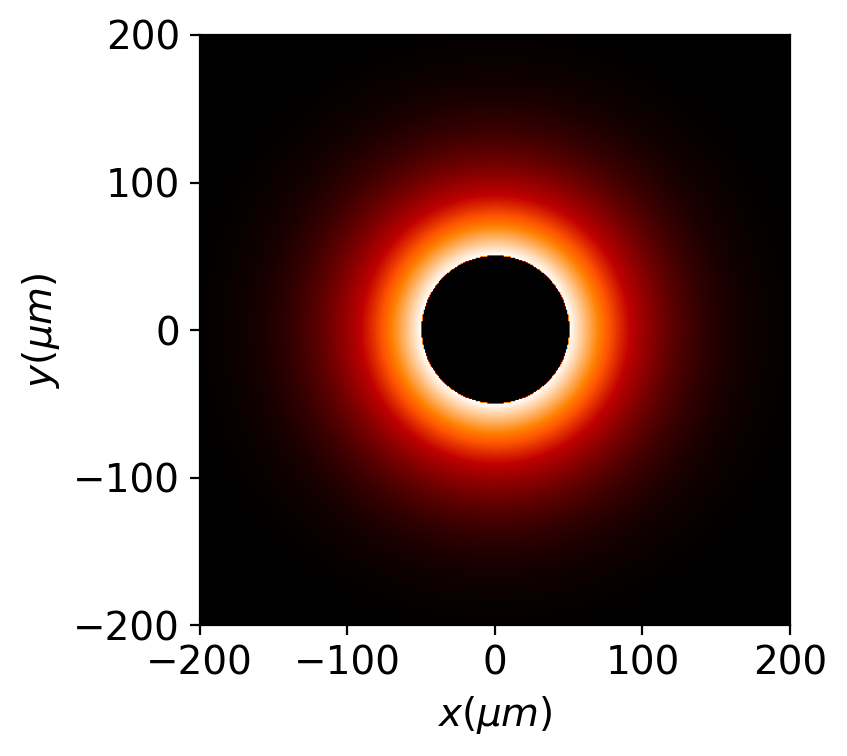

In [11]:
obstacle=Scalar_mask_XY(x0,y0,wavelength)
obstacle.circle(r0=(0,0), radius=50*um)
obstacle.inverse_amplitude()

u1=u0*obstacle

u1.draw();

In [12]:
arago_point=u1.RS(z=2*mm)

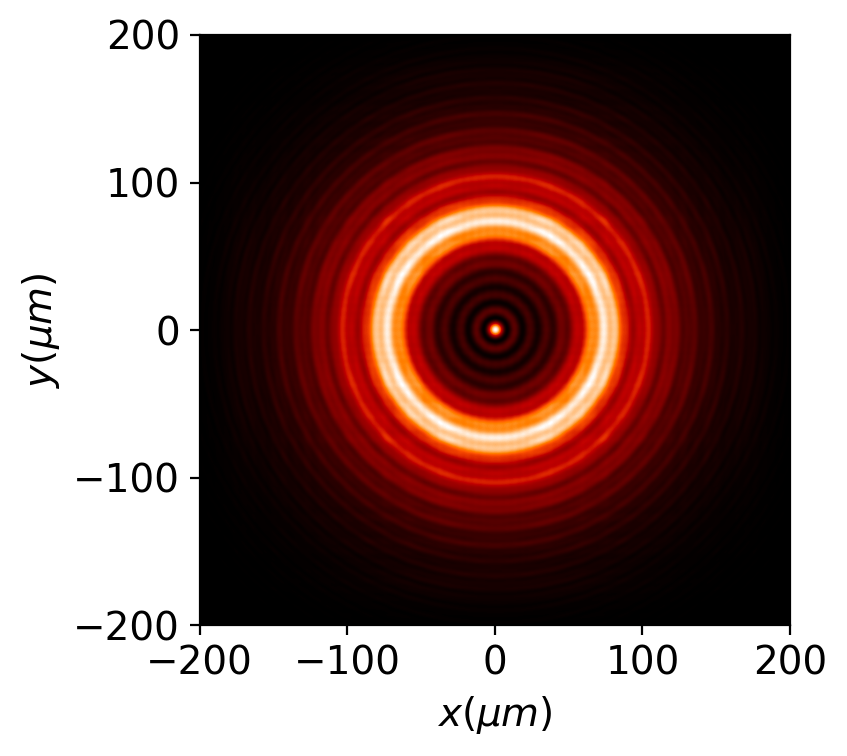

In [13]:
arago_point.draw(logarithm=True);

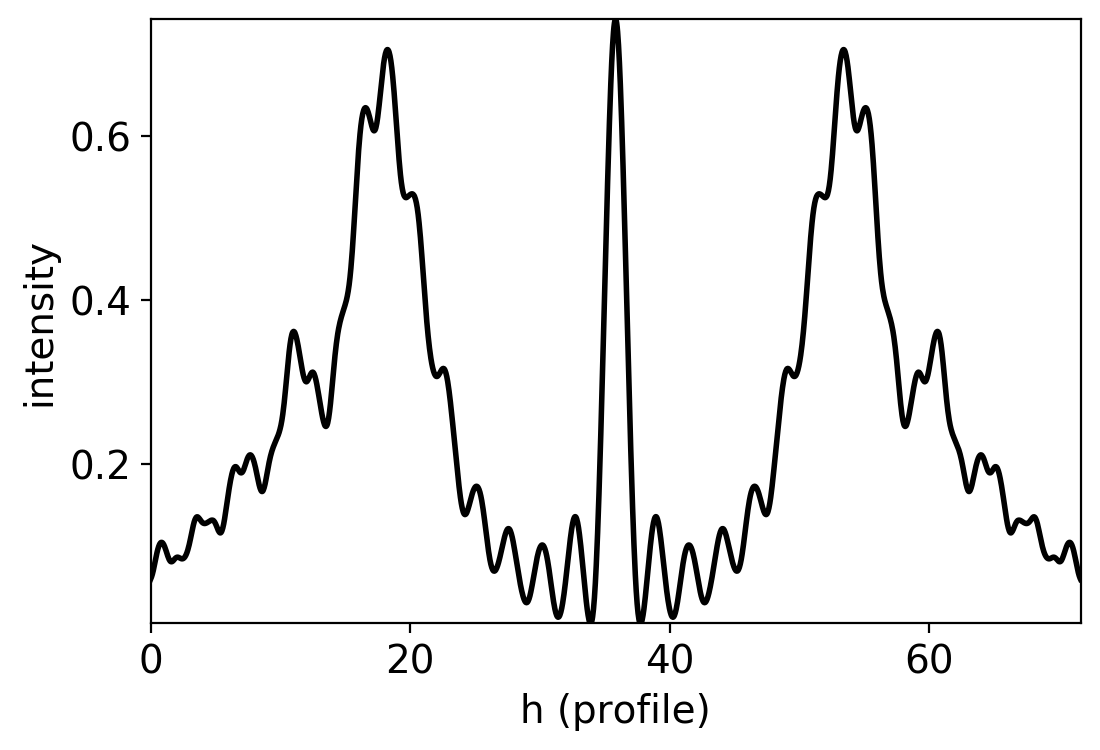

In [14]:
arago_point.draw_profile([-150,0], [150,0], npixels=2048, order=2);

## XYZ

In [19]:
from diffractio import np, plt, um, mm, nm, degrees
from diffractio.scalar_fields_XYZ import Scalar_field_XYZ
from diffractio.scalar_sources_XY import Scalar_source_XY
from diffractio.scalar_masks_XY import Scalar_mask_XY

In [20]:
from diffractio.utils_math import ndgrid
from diffractio.utils_optics import field_parameters
from scipy.interpolate import RegularGridInterpolator

In [21]:
from matplotlib import rcParams
rcParams['figure.dpi']=200
rcParams['font.size']=14

In [37]:
x0=np.linspace(-200*um, 200*um, 512)
y0=np.linspace(-200*um, 200*um, 512)
z0=np.linspace(1*mm, 2*mm, 32)

wavelength=532*nm

In [38]:
u0=Scalar_source_XY(x0,y0,wavelength)
u0.gauss_beam(r0=(0,0), w0=130*um, z0=0, A=1, theta=0.0)

In [39]:
obstacle=Scalar_mask_XY(x0,y0,wavelength)
obstacle.circle(r0=(0,0), radius=50*um)
obstacle.inverse_amplitude()

u1=u0*obstacle

In [40]:
u_xyz=Scalar_field_XYZ(x0,y0,z0,wavelength)

In [41]:
u_xyz.incident_field(u1)

In [42]:
u_xyz.RS()

time in RS= 32.57965564727783. num proc= 30


32.57965564727783

In [43]:
u_xyz.draw_XYZ(kind='intensity', logarithm=False)

Close the window to continue.


<img src="arago.png" width="400">

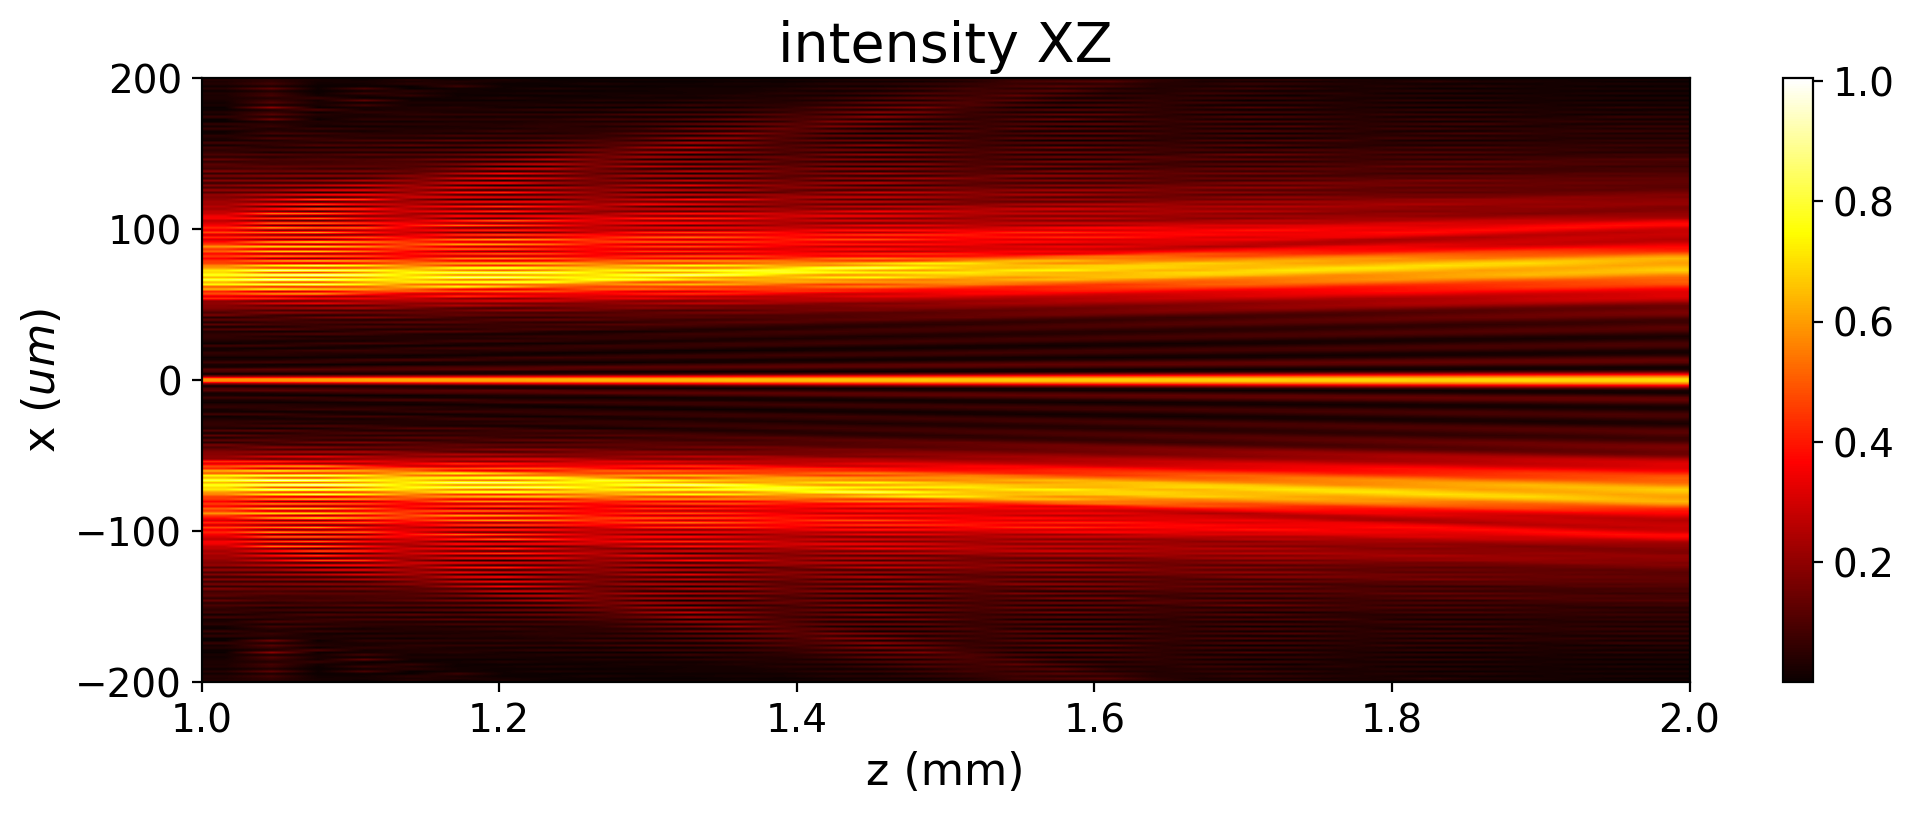

In [19]:
u_xyz.draw_XZ(y0=0)
fig=plt.gcf()
fig.set_size_inches(12,4)

## XZ

**Warning**: The XZ results are **not valid** since, as it is an interferential process, radial symmetry is required. 

In [44]:
from diffractio.scalar_masks_XZ import Scalar_mask_XZ
from diffractio.scalar_masks_X import Scalar_mask_X
from diffractio.scalar_sources_X import Scalar_source_X

In [45]:
x0=np.linspace(-200*um, 200*um, 1024)
z0=np.linspace(1*mm, 2*mm, 512)
wavelength=532*nm

In [46]:
source_x=Scalar_source_X(x0,wavelength)
source_x.gauss_beam(x0=0, w0=130*um, z0=0, A=1, theta=0.0)

In [47]:
mask_x=Scalar_mask_X(x0,wavelength)
mask_x.slit(x0=0, size=100 * um);
mask_x.u=1-mask_x.u

In [48]:
u1=source_x*mask_x

In [49]:
arago_xz=Scalar_mask_XZ(x0,z0,wavelength)
arago_xz.incident_field(u1)

In [50]:
arago_xz.RS();

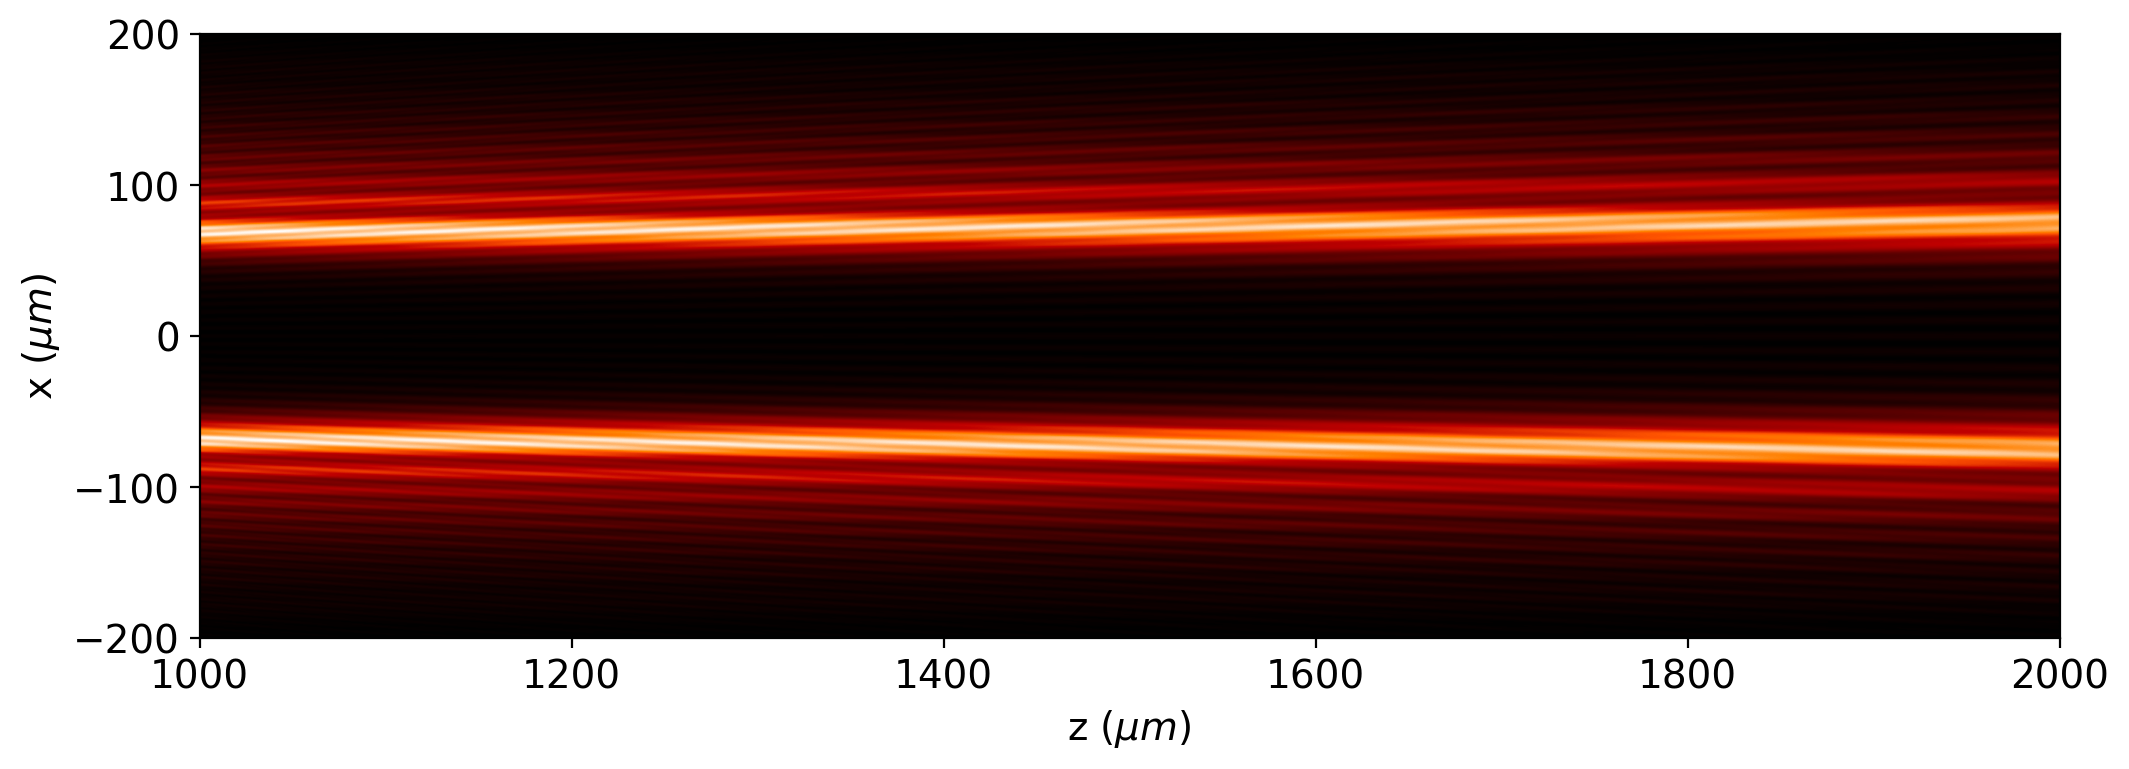

In [51]:
arago_xz.draw()
fig=plt.gcf()
fig.set_size_inches(12,4);